In [1]:
# ---------------------------------------------
# 🛠️ Importing Required Libraries
# ---------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For better plot aesthetics
sns.set(style="whitegrid")

# ---------------------------------------------
# 📂 Load the Cleaned Dataset
# ---------------------------------------------
df = pd.read_csv("../Cleaned_CrimesOnWomen_2001_2024.csv")

# Check structure
df.head()

,Numbers,State,Year,No. of Rape cases,Kidnap And Assault,Dowry Deaths,Assault against women,Assault against modesty of women,Domestic violence,Women Trafficking,Notes
0,0,Andhra Pradesh,2001,871,765,420,3544,2271,5791,7,NaN
1,1,Arunachal Pradesh,2001,33,55,0,78,3,11,0,NaN
2,2,Assam,2001,817,1070,59,850,4,1248,0,NaN
3,3,Bihar,2001,888,518,859,562,21,1558,83,NaN
4,4,Chhattisgarh,2001,959,171,70,1763,161,840,0,NaN


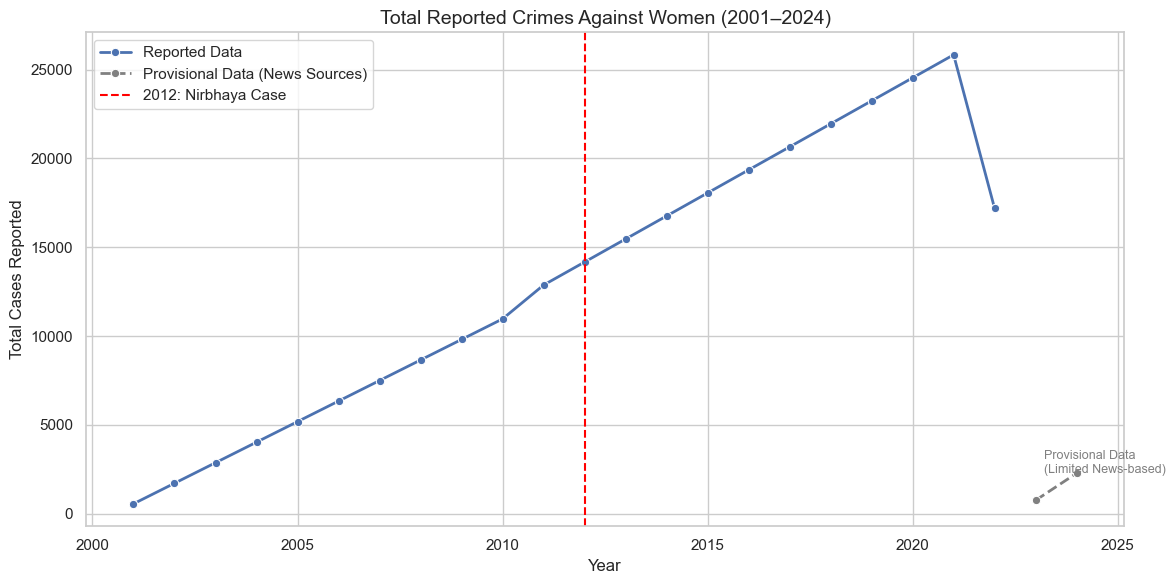

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group total crimes by year
yearly_trend = df.groupby('Year')['Numbers'].sum().reset_index()

# Separate confirmed and provisional years
confirmed = yearly_trend[yearly_trend['Year'] <= 2022]
provisional = yearly_trend[yearly_trend['Year'] >= 2023]

# Plotting
plt.figure(figsize=(12, 6))

# Solid line for confirmed years
sns.lineplot(data=confirmed, x='Year', y='Numbers', marker='o', label='Reported Data', linewidth=2)

# Dotted line for provisional years
sns.lineplot(data=provisional, x='Year', y='Numbers', marker='o', linestyle='--', color='gray', label='Provisional Data (News Sources)', linewidth=2)

# Nirbhaya marker
plt.axvline(x=2012, color='red', linestyle='--', label='2012: Nirbhaya Case')

# Annotations
plt.text(2023.2, provisional['Numbers'].max(), 'Provisional Data\n(Limited News-based)', fontsize=9, color='gray')

# Styling
plt.title("Total Reported Crimes Against Women (2001–2024)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Cases Reported", fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\marya\AppData\Local\Temp\ipykernel_48384\2521817556.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=period_totals, x='Period', y='Numbers', palette='Blues_d')


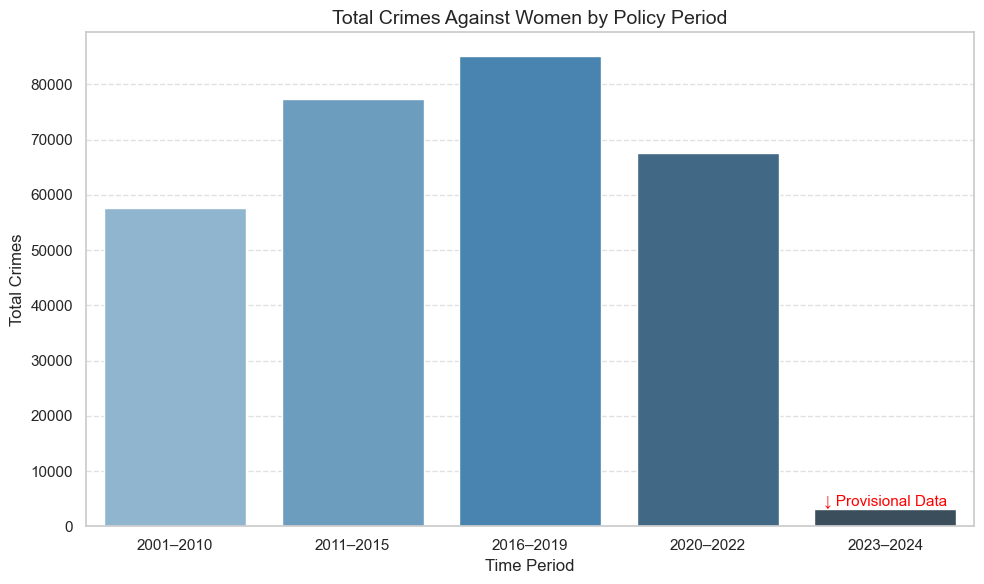

In [8]:
# ---------------------------------------------
# 🏷️ Add 'Period' Column Based on Year Ranges
# ---------------------------------------------
def classify_period(year):
    if 2001 <= year <= 2010:
        return "2001–2010"
    elif 2011 <= year <= 2015:
        return "2011–2015"
    elif 2016 <= year <= 2019:
        return "2016–2019"
    elif 2020 <= year <= 2022:
        return "2020–2022"
    else:
        return "2023–2024"

df['Period'] = df['Year'].apply(classify_period)

# ---------------------------------------------
# 📊 Plot Total Crimes per Period
# ---------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

period_totals = df.groupby('Period')['Numbers'].sum().reset_index()

plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=period_totals, x='Period', y='Numbers', palette='Blues_d')

# Add annotation for provisional data on the last bar
for index, row in period_totals.iterrows():
    if row['Period'] == '2023–2024':
        bar = barplot.patches[index]
        barplot.annotate(
            '↓ Provisional Data',
            (bar.get_x() + bar.get_width() / 2, bar.get_height()),
            ha='center', va='bottom',
            fontsize=11, color='red'
        )

# Plot styling
plt.title("Total Crimes Against Women by Policy Period", fontsize=14)
plt.xlabel("Time Period", fontsize=12)
plt.ylabel("Total Crimes", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

C:\Users\marya\AppData\Local\Temp\ipykernel_48384\2729927794.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_totals.head(15), y='State', x='Numbers', palette='Reds_r')


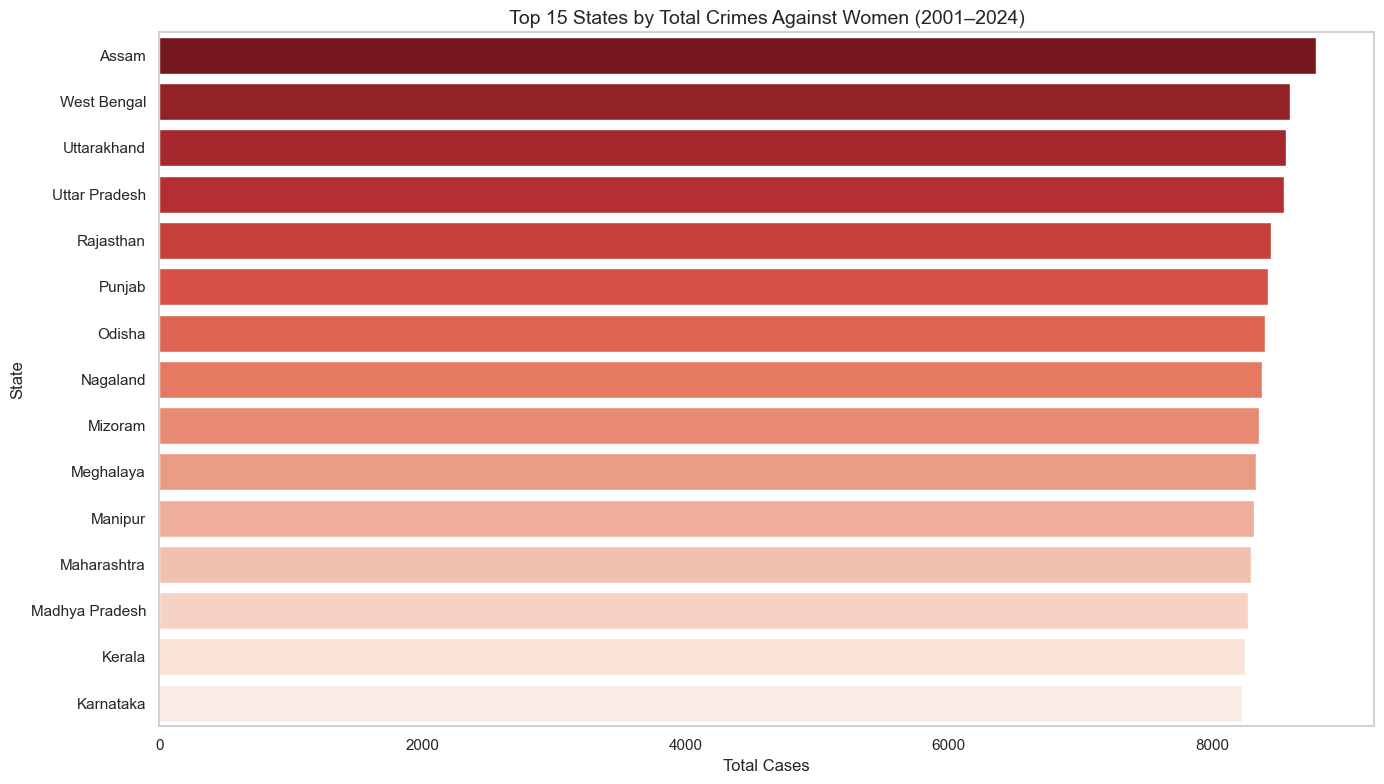

In [13]:
#import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ---------------------------------------------
# 📍 Total Crimes by State (Excluding Outlier)
# ---------------------------------------------

# ❗ We are excluding 'Dadra & Nagar Haveli and Daman & Diu' because:
# The state shows abnormally high crime totals in 2020–2021 likely due to 
# data anomalies or the merger of two union territories. This skews the 
# overall rankings and may mislead the interpretation of crime patterns.

df_filtered = df[df['State'] != 'Dadra & Nagar Haveli and Daman & Diu']

# ✅ Group by State and calculate total crimes
state_totals = (
    df_filtered.groupby('State')['Numbers']
    .sum()
    .reset_index()
    .sort_values(by='Numbers', ascending=False)
)

# ✅ Plot the top 15 states
plt.figure(figsize=(14, 8))
sns.barplot(data=state_totals.head(15), y='State', x='Numbers', palette='Reds_r')
plt.title("Top 15 States by Total Crimes Against Women (2001–2024)", fontsize=14)
plt.xlabel("Total Cases", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.grid(axis='x')
plt.tight_layout()
plt.show()

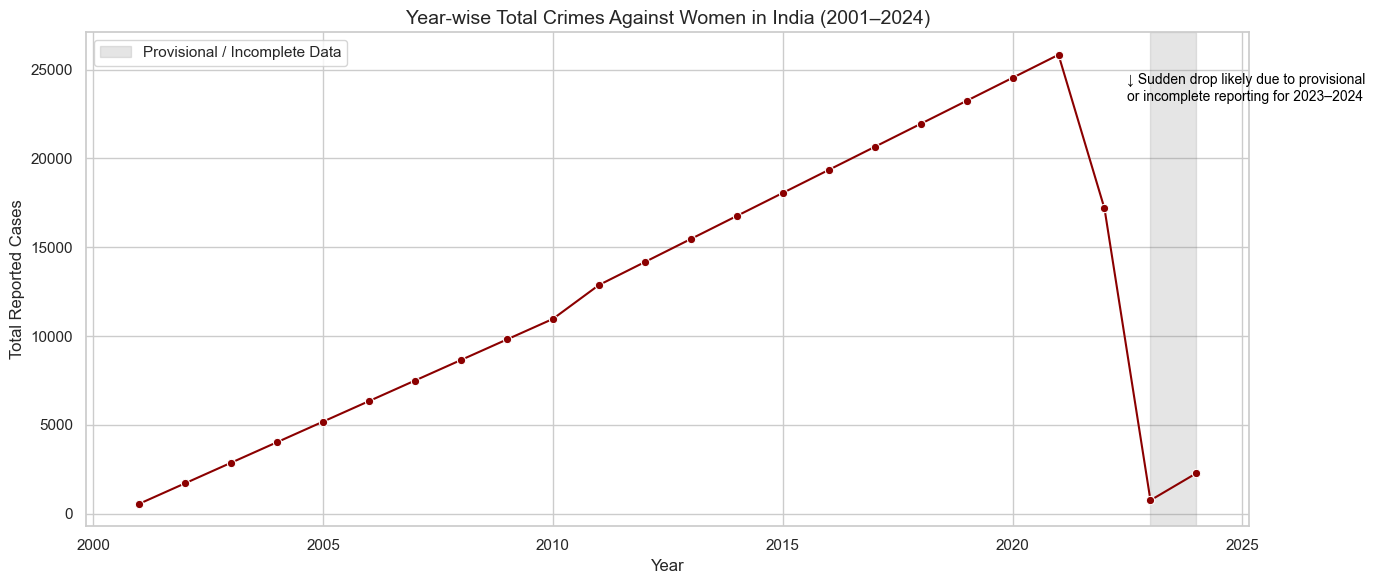

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -------------------------------
# 📈 Year-wise Crime Trend (2001–2024)
# -------------------------------

# ✅ Group total crimes by year across India
yearly_crimes = df.groupby('Year')['Numbers'].sum().reset_index()

# ✅ Plot the trend
plt.figure(figsize=(14, 6))
sns.lineplot(data=yearly_crimes, x='Year', y='Numbers', marker='o', color='darkred')

# ⚠️ Highlight 2023–2024: Provisional or under-reported data
plt.axvspan(2023, 2024, color='gray', alpha=0.2, label='Provisional / Incomplete Data')

# 📝 Add explanatory text
plt.text(
    2022.5,                        # x-position
    yearly_crimes['Numbers'].max() * 0.9,  # y-position (90% height of chart)
    "↓ Sudden drop likely due to provisional\nor incomplete reporting for 2023–2024",
    fontsize=10,
    color='black'
)

# 🖼️ Final plot formatting
plt.title("Year-wise Total Crimes Against Women in India (2001–2024)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Reported Cases", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\marya\AppData\Local\Temp\ipykernel_48384\2743152744.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=period_totals, x='Period', y='Numbers', palette='OrRd_r')
C:\Users\marya\AppData\Local\Temp\ipykernel_48384\2743152744.py:37: UserWarning: Glyph 9888 (\N{WARNING SIGN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\marya\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9888 (\N{WARNING SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


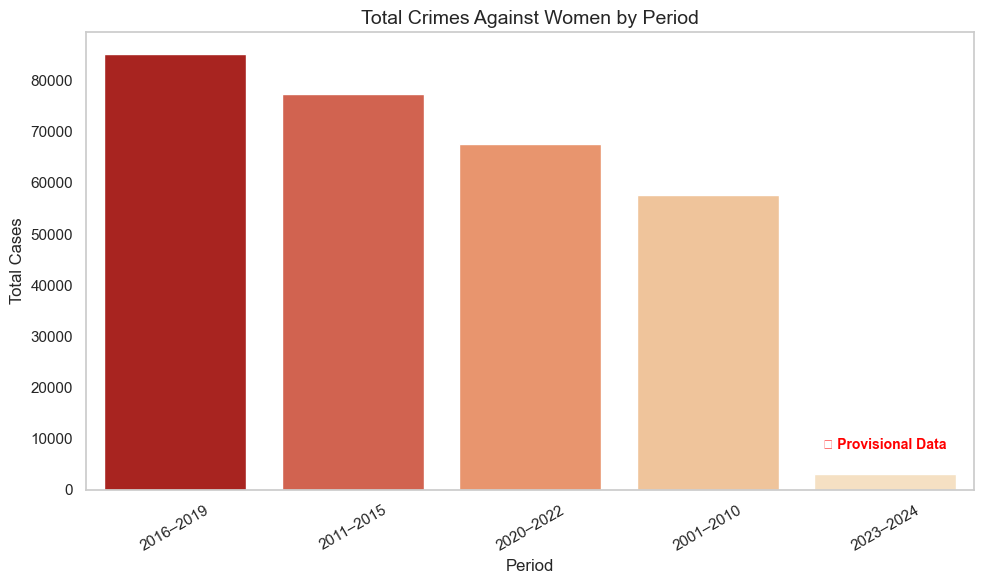

In [16]:
# -------------------------------
# 📊 Period-wise Crime Trends (With Annotation)
# -------------------------------

# ✅ Group by 'Period' column and calculate total crimes
period_totals = (
    df.groupby('Period')['Numbers']
    .sum()
    .reset_index()
    .sort_values(by='Numbers', ascending=False)
)

# ✅ Plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=period_totals, x='Period', y='Numbers', palette='OrRd_r')

# 🖼️ Labels and Formatting
plt.title("Total Crimes Against Women by Period", fontsize=14)
plt.xlabel("Period", fontsize=12)
plt.ylabel("Total Cases", fontsize=12)
plt.xticks(rotation=30)
plt.grid(axis='y')

# 📝 Add annotation for the 2023–2024 period
for index, row in period_totals.iterrows():
    if row['Period'] == '2023–2024':
        plt.text(
            x=index,
            y=row['Numbers'] + 5000,  # Adjust vertical position
            s="⚠ Provisional Data",
            ha='center',
            fontsize=10,
            color='red',
            weight='bold'
        )

plt.tight_layout()
plt.show()


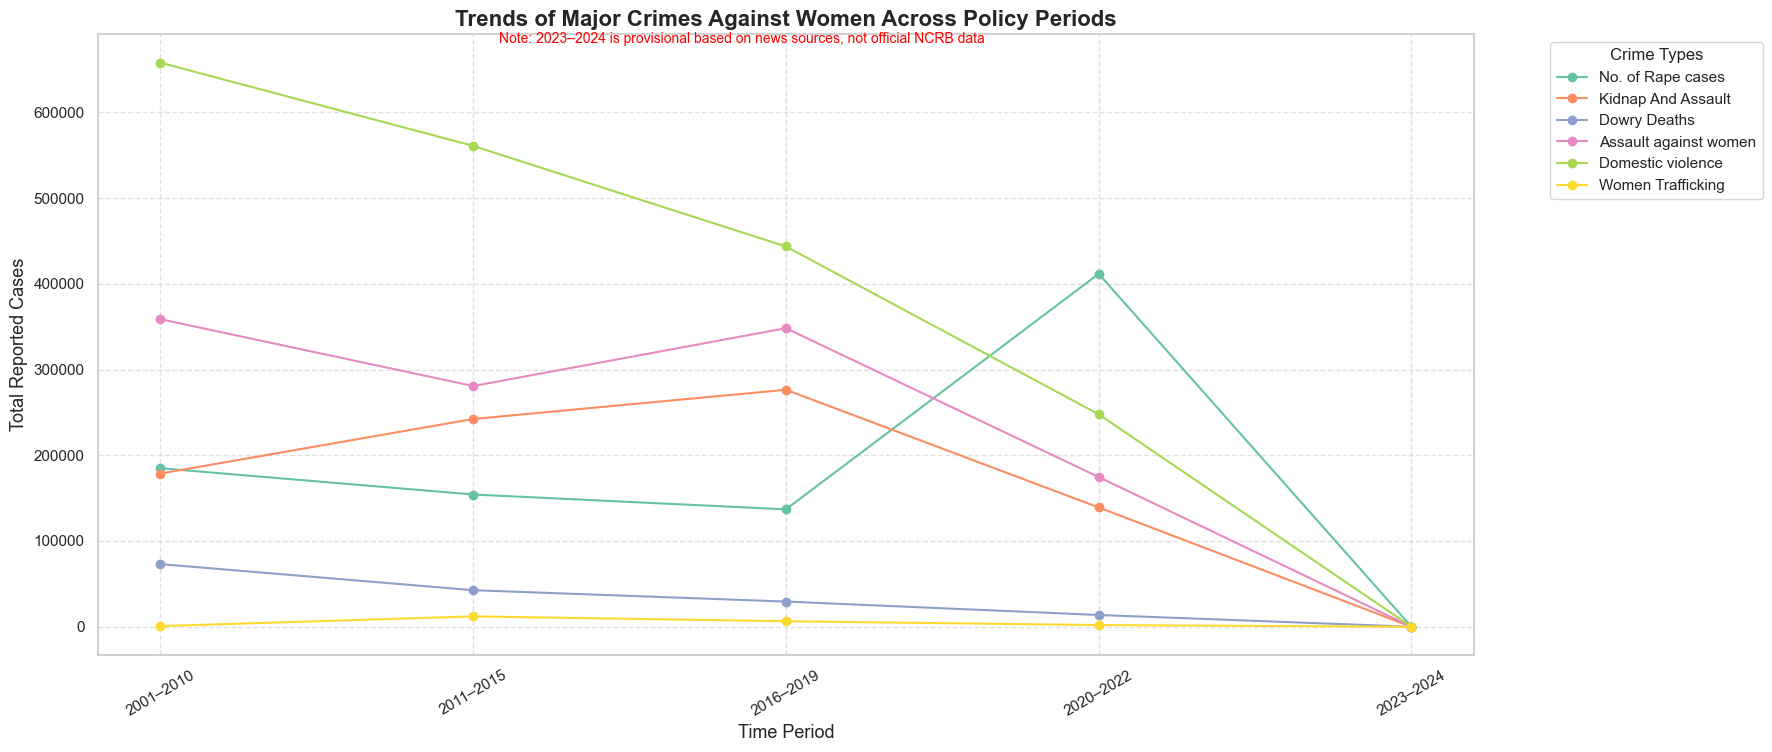

In [22]:

import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------------------
# 📊 Trend of Major Crime Types Across Periods
# -------------------------------------------

# ✅ List of major crime columns
crime_types = [
    'No. of Rape cases',
    'Kidnap And Assault',
    'Dowry Deaths',
    'Assault against women',
    'Domestic violence',
    'Women Trafficking'
]

# ✅ Group data by Period
crime_by_period = df.groupby('Period')[crime_types].sum().reset_index()

# ✅ Plot setup
plt.figure(figsize=(15, 8))
colors = sns.color_palette('Set2', len(crime_types))  # colorful but readable palette

# ✅ Plot each crime line (without end text)
for i, crime in enumerate(crime_types):
    plt.plot(crime_by_period['Period'], crime_by_period[crime], marker='o', label=crime, color=colors[i])

# 📍 Add title and labels
plt.title("Trends of Major Crimes Against Women Across Policy Periods", fontsize=16, fontweight='bold')
plt.suptitle("Note: 2023–2024 is provisional based on news sources, not official NCRB data", fontsize=10, color='red', y=0.91)
plt.xlabel("Time Period", fontsize=13)
plt.ylabel("Total Reported Cases", fontsize=13)
plt.xticks(rotation=30)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# 📌 Keep legend on the right
plt.legend(title="Crime Types", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


C:\Users\marya\AppData\Local\Temp\ipykernel_48384\3812144634.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=period_totals, x='Period', y='Numbers', palette='OrRd_r')


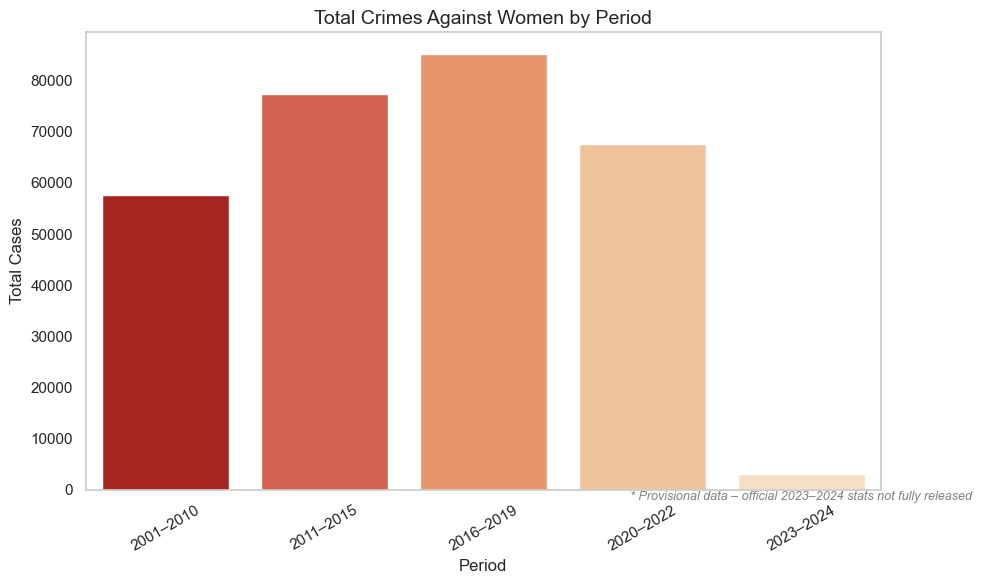

In [28]:
# -------------------------------
# 📊 Period-wise Crime Trends (Annotation below 2023–2024 bar)
# -------------------------------

import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Group by 'Period' column and calculate total crimes
period_totals = (
    df.groupby('Period')['Numbers']
    .sum()
    .reset_index()
    .sort_values(by='Period')  # Keep chronological order
)

# ✅ Plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=period_totals, x='Period', y='Numbers', palette='OrRd_r')

# 🖼️ Labels and Formatting
plt.title("Total Crimes Against Women by Period", fontsize=14)
plt.xlabel("Period", fontsize=12)
plt.ylabel("Total Cases", fontsize=12)
plt.xticks(rotation=30)
plt.grid(axis='y')

# 📝 Add annotation below the 2023–2024 bar
for i, period in enumerate(period_totals['Period']):
    if period == '2023–2024':
        plt.text(i, -2000,  # 👈 negative y-value to place below x-axis
                 "* Provisional data – official 2023–2024 stats not fully released",
                 ha='center', fontsize=9, color='gray', fontstyle='italic')

plt.tight_layout()
plt.show()


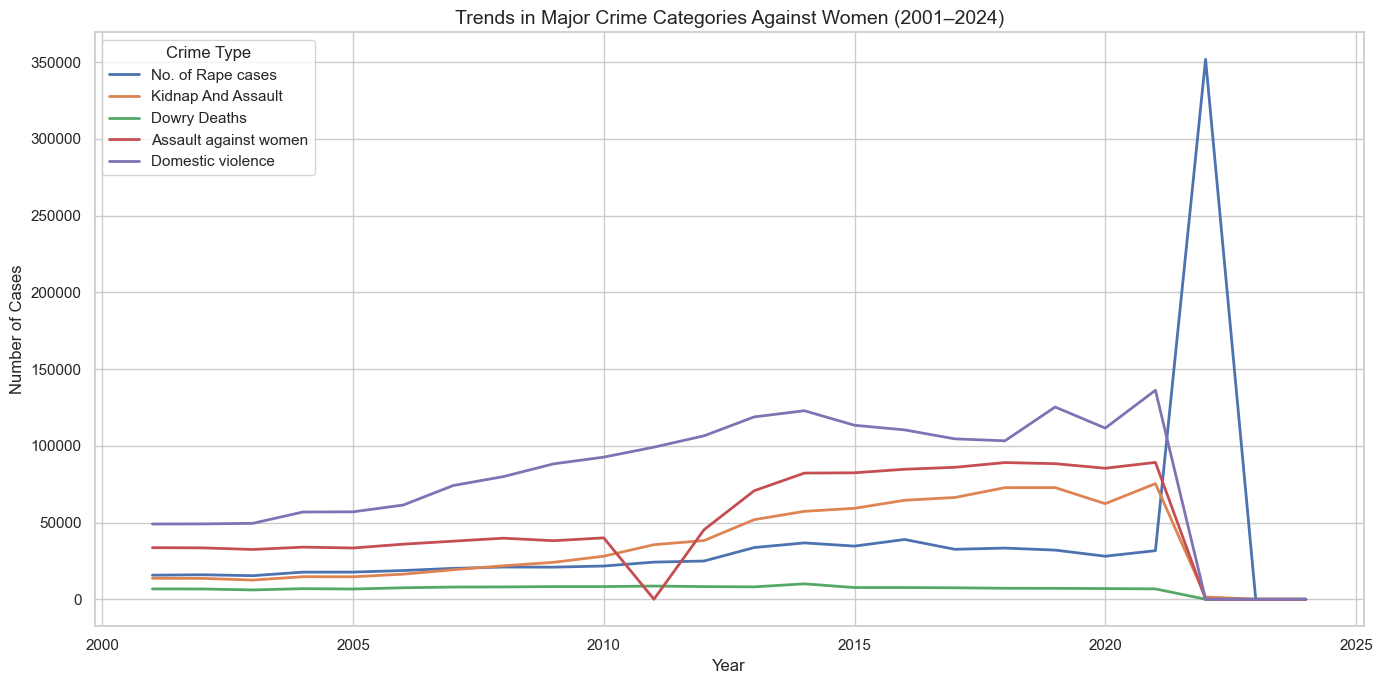

In [31]:

# -------------------------------------------------
# 📈 Trends of Major Crime Categories Over Time
# -------------------------------------------------

# ✅ Select relevant columns
crime_types = [
    'No. of Rape cases',
    'Kidnap And Assault',
    'Dowry Deaths',
    'Assault against women',
    'Domestic violence'
]

# ✅ Group by Year and sum each category
category_trends = (
    df.groupby('Year')[crime_types]
    .sum()
    .reset_index()
)

# ✅ Plot
plt.figure(figsize=(14, 7))
for crime in crime_types:
    sns.lineplot(data=category_trends, x='Year', y=crime, label=crime, linewidth=2)

# 🖼️ Labels
plt.title("Trends in Major Crime Categories Against Women (2001–2024)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Cases", fontsize=12)
plt.grid(True)
plt.legend(title="Crime Type")
plt.tight_layout()
plt.show()


In [36]:
import pandas as pd

# ✅ 1. Create a new column for total crimes
df['Total Crimes'] = df[['No. of Rape cases', 'Kidnap And Assault', 'Dowry Deaths',
                         'Assault against women', 'Assault against modesty of women',
                         'Domestic violence', 'Women Trafficking']].sum(axis=1)

# ✅ 2. Group by state and sum total crimes
statewise_total = df.groupby('State')['Total Crimes'].sum().sort_values(ascending=False)

# ✅ 3. Convert to DataFrame for clean display
statewise_total_df = statewise_total.reset_index()

# ✅ 4. Show top 10 states
statewise_total_df.head(10)


,State,Total Crimes
0,Uttar Pradesh,589425
1,Madhya Pradesh,445922
2,Rajasthan,424322
3,Andhra Pradesh,416626
4,Maharashtra,410963
5,West Bengal,409243
6,Assam,306130
7,Odisha,218422
8,Kerala,218199
9,Bihar,210108


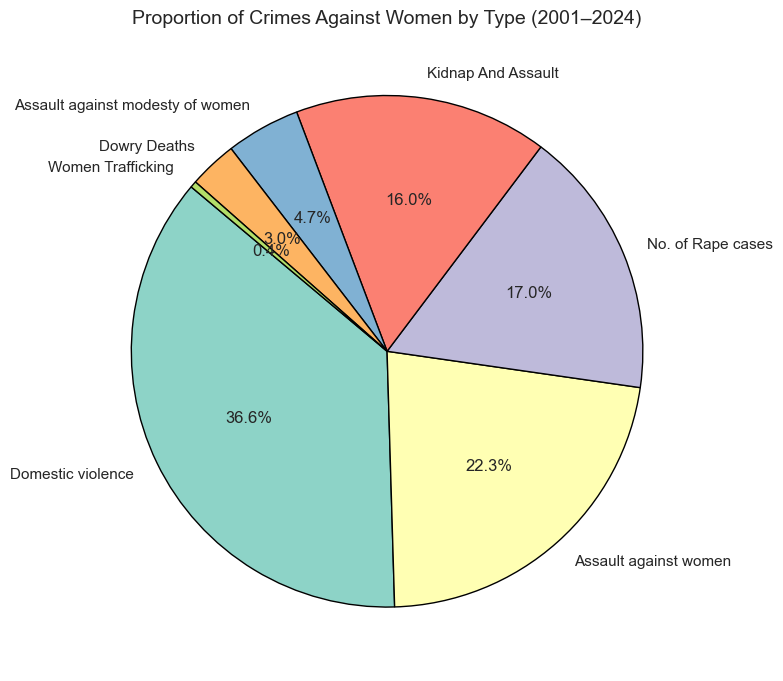

In [39]:
import matplotlib.pyplot as plt

# Sum each crime type across all years and states
crime_totals = df[['No. of Rape cases', 'Kidnap And Assault', 'Dowry Deaths',
                   'Assault against women', 'Assault against modesty of women',
                   'Domestic violence', 'Women Trafficking']].sum().sort_values(ascending=False)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(crime_totals, labels=crime_totals.index, autopct='%1.1f%%', startangle=140, 
        wedgeprops={'edgecolor': 'black'}, colors=plt.cm.Set3.colors)

plt.title("Proportion of Crimes Against Women by Type (2001–2024)", fontsize=14)
plt.tight_layout()
plt.show()

In [40]:
# Add Total Crimes column if not already added
df['Total Crimes'] = df[['No. of Rape cases', 'Kidnap And Assault', 'Dowry Deaths',
                         'Assault against women', 'Assault against modesty of women',
                         'Domestic violence', 'Women Trafficking']].sum(axis=1)

# Filter for two periods
early_period = df[(df['Year'] >= 2001) & (df['Year'] <= 2010)]
recent_period = df[(df['Year'] >= 2015) & (df['Year'] <= 2024)]

# Group by State and calculate average annual crimes
early_avg = early_period.groupby('State')['Total Crimes'].mean()
recent_avg = recent_period.groupby('State')['Total Crimes'].mean()

# Merge and calculate % change
improvement_df = pd.DataFrame({
    'Early Avg (2001–2010)': early_avg,
    'Recent Avg (2015–2024)': recent_avg
})
improvement_df['% Change'] = ((improvement_df['Recent Avg (2015–2024)'] - improvement_df['Early Avg (2001–2010)']) / improvement_df['Early Avg (2001–2010)']) * 100

# Sort to find improving states (negative % change)
improving_states = improvement_df.sort_values(by='% Change')

# Display top improving states
improving_states.head(10)

,Early Avg (2001–2010),Recent Avg (2015–2024),% Change
State,,,
Puducherry,110.2,63.428571,-42.442313
Mizoram,136.1,109.750000,-19.360764
Andhra Pradesh,19108.1,16682.500000,-12.694093
Gujarat,6920.5,6516.125000,-5.843147
West Bengal,14343.5,17781.500000,23.969045
Tamil Nadu,5658.4,7431.285714,31.331926
Manipur,163.6,233.000000,42.420538
Himachal Pradesh,878.0,1391.875000,58.527904
Chhattisgarh,3768.4,6045.500000,60.426176


In [42]:
df.head()

,Numbers,State,Year,No. of Rape cases,Kidnap And Assault,Dowry Deaths,Assault against women,Assault against modesty of women,Domestic violence,Women Trafficking,Notes,Period,Total Crimes
0,0,Andhra Pradesh,2001,871,765,420,3544,2271,5791,7,NaN,2001–2010,13669
1,1,Arunachal Pradesh,2001,33,55,0,78,3,11,0,NaN,2001–2010,180
2,2,Assam,2001,817,1070,59,850,4,1248,0,NaN,2001–2010,4048
3,3,Bihar,2001,888,518,859,562,21,1558,83,NaN,2001–2010,4489
4,4,Chhattisgarh,2001,959,171,70,1763,161,840,0,NaN,2001–2010,3964


In [6]:
import pandas as pd

# ✅ Load your actual CSV file (replace filename accordingly)
df = pd.read_csv(r'C:\Users\marya\Downloads\archive (2)\Cleaned_CrimesOnWomen_2001_2024.csv')  # 👈 Replace this!

# ✅ Add 'Total Crimes' column if not present
if 'Total Crimes' not in df.columns:
    df['Total Crimes'] = df[['No. of Rape cases', 'Kidnap And Assault', 'Dowry Deaths',
                             'Assault against women', 'Assault against modesty of women',
                             'Domestic violence', 'Women Trafficking']].sum(axis=1)

# ✅ Save to a new CSV for Power BI
df.to_csv(r'C:\Users\marya\Downloads\final_women_crime_dataset.csv', index=False)

print("✅ File saved to Downloads as 'final_women_crime_dataset.csv'")


✅ File saved to Downloads as 'final_women_crime_dataset.csv'


In [7]:
df.head()

,Numbers,State,Year,No. of Rape cases,Kidnap And Assault,Dowry Deaths,Assault against women,Assault against modesty of women,Domestic violence,Women Trafficking,Notes,Total Crimes
0,0,Andhra Pradesh,2001,871,765,420,3544,2271,5791,7,NaN,13669
1,1,Arunachal Pradesh,2001,33,55,0,78,3,11,0,NaN,180
2,2,Assam,2001,817,1070,59,850,4,1248,0,NaN,4048
3,3,Bihar,2001,888,518,859,562,21,1558,83,NaN,4489
4,4,Chhattisgarh,2001,959,171,70,1763,161,840,0,NaN,3964
